# CH3-神經網路
我們有好消息與壞消息，好消息是我們能夠透過感知器製作出一台電腦。<br>
壞消息是，設定權重的工作，亦即決定符合期待的輸入與輸出之適當權重，現在仍然以人工方式來進行<br>


## 3.1. 從感知器到神經網路
此小節將以感知器的相異點為主，解說神經網路結構。


### 3.1.1 神經網路與感知器
還記得前幾章的感知器發火公式嗎?<br>
<br>$
y=\begin{cases}
0,\quad (b + w1x1 + w2x2 \leq 0) \\\\
1,\quad  (b + w1x1 + w2x2 > 0) 
\end{cases}
$<br>

接下來，我們想要將其轉換為更簡單的公式：
<br>
$
y = h(b+w1x1+w2x2)
$...................(3.2)

<br>$
h(x)=\begin{cases}
0,\quad (x \leq 0) \\\\
1,\quad  (x > 0) 
\end{cases}
$........................(3.3)<br>
由上式 (3.2),(3.3) 我們可以看到$h(x)$函數，這種將輸入訊號轉換成輸出訊號的函數，一般稱為活化函數( activition function )。<br>
接下來，我們繼續轉換上式( 3.2 )，此式進行了2階段的處理，包刮計算含權重的輸出訊號總和，以及利用活化函數轉換總和。<br>
因此詳細寫出算式( 3.2 )，我們可以分成下列兩個算式。
<br>
$
a = b+w1x1+w2x2
$..........................(3.4)
<br>
$
y = h(a)
$........................................................(3.5)<br>
處理過程是，在算式(3.4)中，計算含權重的輸入訊號與偏權值的總和，把這個部分當做a。<br>
接著在算式(3.5)中，我們利用$h( )$轉換a，輸出成$y$。


## 3.2 活化函數
實際上，算式(3.3)顯示的活化函數是以臨界值為分界來轉換輸出的函數，因此稱為「階梯函數」。<br>
不過我們能夠把活化函數中，感知器所採用的「階梯函數」改成其他的函數。

### 3.2.1 sigmoid函數
神經網路常用的活化函數之一，就是sigmoid函數：<br>
$
h(x)=\frac{1}{1 + exp(-x)} .................(3.6)
$<br>
當然，常用的函數亦有ReLu、Tahn等函數。

### 3.2.3 執行階梯函數
我們以圖表方式來顯示階梯函數( 圖形化方式對於了解函數很有幫助 )。


In [2]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0
# 雖然這很容易理解，但這不能使用於np.array()中，所以我們擴充其方法
def step_frunction(x):
    y = x > 0
    return y.astype(np.int)


In [7]:
# 我們來以直覺的方式理解一下上面做了甚麼更動
import numpy as np
x = np.array([-1, 1 ,2])
print(x)
y = x > 0
print(y, y.dtype)
y = y.astype(np.int)
y


[-1  1  2]
[False  True  True] bool


array([0, 1, 1])

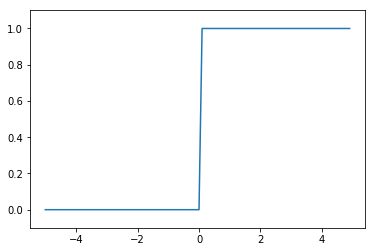

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def step_function(x):
    return np.array(x >0, dtype=np.int)

x = np.arange(-5, 5, .1)
y = step_frunction(x)
plt.plot(x, y)
plt.ylim(-.1, 1.1) #設定y軸的範圍
plt.show()

# step_function( )是從Numpy陣列中，取出引數
# 針對陣列的各個元素，執行階梯函數，並回傳陣列結果。


### 3.2.4執行 sigmoid 函數
接下來，我們來執行sigmoid函數。


In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp( -x ))


In [12]:
# 事實上，在sigmoid函數中，輸入numpy陣列後，會執行以下正確的計算。
x = np.array([-1, 1, 2])
sigmoid(x)


array([0.26894142, 0.73105858, 0.88079708])

[]

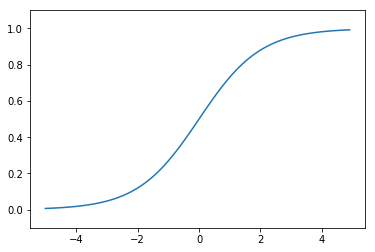

In [13]:
# 繪製sigmoid圖表
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5, 5, .1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-.1, 1.1) #設定y軸範圍
plt.plot()


## 3.2.5 非線性函數
階梯函數與sigmoid函數皆為非線性函數。而神經網路的活化函數必須使用非線性函數，為何? 如果使用了線性函數，那麼增加神經網路的層數就變得毫無意義了。<br>
線性函數的問題起因於，不論增加多少層，都一定存在著執行相同內容的「無隱藏層網路」。<br>
例如：設一線性函數$h(x)=cx$，執行$y(x) = h(h(h(x)))$的運算，對應的是$y(x)=c \times c \times c \times x $的乘法運算。卻同樣是$y(x) = ax (a=c^3)$乘法，因此可以用無隱藏層的網路來表示。

 

## 3.2.6 執行三層神經網路
我們先來看神經網路中，輸入層→隱藏層→輸出層，訊息的傳遞過程。<br>
![nns](./img/nn.PNG)<br>
輸入→隱藏層<br>
![nns1](./img/nn1.PNG)<br>
隱藏層→輸出層<br>
如圖所示，輸出層使用的活化函數必須配合解決問題的性質而定。<br>
例如，回歸問題一般使用恆等函數(輸出=輸入)，2類問題使用sigmoid函數，多類別使用softmax函數。



## 3.2.7 統一執行處理
到此我們已經介紹三層神經網路，現在我們來實現他。<br>
我們先定義init_network() 與 forward()等函數，利用init_network()進行權重與偏權重值的初始化，並儲存於字典型態的變數network中，network中必須儲存各層輸出的流程。<br>
到這裡我們就先定義好了前向傳播流程了!!



In [5]:
def identity_function(x): #輸入＝輸出
    return x
import numpy as np
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, .3, .5], [.2, .4, .6 ]])
    network['b1'] = np.array([.1, .2, .3])
    network['W2'] = np.array([[0.1, .4,], [.2, .5], [.2, .6 ]])
    network['b2'] = np.array([.1, .2])
    network['W3'] = np.array([[0.1, .3,], [.2, .4]])
    network['b3'] = np.array([.1, .2])
    
    return network

def forward (network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(W3, z2) + b3
    y = identity_function(a3)
    
    return y
    
network = init_network()
x = np.array([1, 0.5])
y = forward(network, x)
print(y)


[0.39215613 0.63011011]


## 恆等函數與softmax函數
恆等函數是將輸入直接當作輸出的函數。然而，分類問題所使用的softmax函數，是用以下算是表示。<br>
$
y_k =  \frac {exp(a_k)}{\sum_{i=1}^{n}{exp(a_i)}}
$<br>
其中，$e^x$為指數函數(納皮爾常數)。<br>
要注意的是，在執行softmax時可能會出現溢位。所以我們要將softmax加以改良：
$
\begin{align}
y_k &= \frac {exp(a_k)}{\sum_{i=1}^{n}{exp(a_i)}}  \\
    &= \frac {C exp(a_k)}{C \sum_{i=1}^{n}{exp(a_i)}}  \\
    &= \frac {exp(a_k + logC)}{\sum_{i=1}^{n}{exp(a_i + logC)}}  \\
    &= \frac {exp(a_k + C^-)}{\sum_{i=1}^{n}{exp(a_i + C^-)}}  \tag{3.1}
\end{align}
$<br>

算式(3.1)要說明的是，執行sofmax的指數函數運算時，加上(或減去)某個數(不論多大)，結果不變。這裡$C^-$可以是任何值。方便說明，我們舉個例：


In [8]:
import numpy as np
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) #無法計算(數字太大)
c = np.max(a) #1010
print(a-c)
np.exp(a-c) / np.sum(np.exp(a-c))


[  0 -10 -20]


C:\Users\Camel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Camel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [10]:
# 如上述範例所示，在nan( not a number: 1不定數 )減去輸入訊號的最大值，無法正確計算，根據上述內容，執行softmax函數時會變成以下。
def softmax (a):
    c = np.max(a)
    exp_a = np.exp(a-c) #防範溢位!
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y
print(softmax(a = np.array([1010, 1000, 990])))


[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [11]:
# 使用softmax()函數，我們可以利用以下方式做計算神經網路的輸出
a = np.array([.3, 2.9, 4])
y = softmax(a)
print(y)
np.sum(y)


[0.01821127 0.24519181 0.73659691]


1.0

## 3.2.8 softmax函數的特色
如上所示，softmax函數的輸出是0~1之間，此外，softmax()函數的輸出總和為1。<br><br>
{note} 解決ML問題的步驟分成「學習」、推論兩階段。一開始利用學習階段來學習模型，接著在推論階段使用學習過的模型，對未知的資料進行推論( 分類 )。而推論階段一般會省略輸出層的softmax函數。在輸出層使用softmax函數的理由，與神經網路的學習有關(下一章說明)。


# 3.3 辨識手寫數字
學習過神經網路的結構後，我們來練習實際的問題。以下要分類手寫數字影像。假設已經完成學習，使用學習完的參數，執行神經網路的「推論處理」。另外，這種推論處理又稱作神經網路的「正向傳播」(forward propagation)。<br><br>
{note} 和解決ML學習問題的步驟一樣(「學習」「推論」)使用神經網路解決問題時，一開始要使用訓練資料( 學習資料 )，進行權重參數學習；推論時，使用學習過的參數，將輸入資料進行分類。


## 3.3.1 MNIST資料集
MNIST的影像資料是28x28的灰階影像，我們用此資料庫做練習。<br>

一開始我們先載入父目錄檔案的設定，接著載入 dataset/mnist.py 的 load_mnist 函數，再利用仔載入的 load_mnist 函數，讀取MNIST資料集。最初呼叫 load_mnist 函數時，需下載MNIST資料，所以必須接上網路。第二次以後則可以直接讀取本地檔案。


In [20]:
import sys, os
sys.path.append(os.path.abspath('../dl_ex')) #載入父目錄檔案的設定
from dataset.mnist import load_mnist

# 開始呼叫
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

# 分別輸出資料的形狀
print(x_train.shape) # (60000, 784)
print(t_train.shape) #(60000, )
print(x_test.shape)  #(10000, 784)
print(t_test.shape)  #(10000, )


Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [32]:
# 接下來，我們來試著顯示MNIST圖像
import sys, os
sys.path.append(os.path.abspath('../dl_ex')) #載入父目錄檔案的設定
from dataset.mnist import load_mnist
import numpy as np
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 將形狀便形成原本的影像大小!
print(img.shape)  # (28, 28)

img_show(img)


4
(784,)
(28, 28)


## 3.3.2 神經網路的推論處理
接下來，我們針對MNIST資料集進行推論處理，執行由784個輸入層神經元與10個輸出層神經元所構成的神經網路。<br><br>

{note} Python中，有個叫做pickle的功能，可以把執行的程式物件，當作檔案暫存起來。載入暫存的pickle檔案，可以立刻恢復剛才程式執行的物件。


In [39]:
import sys, os
sys.path.append(os.path.abspath('../dl_ex')) #載入父目錄檔案的設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network   
    
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


在init_network()中，載入暫存在pickle檔案samle_weight.pkl中，已經學習完畢的權重參數值為字典型態的變數。接下來我們要進行推論的過程了!


In [40]:
x ,t =get_data()
network = init_network()

accuracy_cnt = 0
for i in range (len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) #取得機率最高的元素索引值
    if p == t[i]:
        accuracy_cnt += 1
print('Accuracy:' + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352


### 解說
最初取得MNIST資料集產生網路。接著用for陳述式逐一取出儲存在x的影像資料，利用predict()函數分類。predict()是把輸出個標籤的機率輸出成Numpy陣列。<br>
接著從最大機率清單中，取出最大值的索引值，亦即第i個算的機率最高，就把它當成預測結果。最後神經網路預測的答案與正確答案標籤比對，將正確答案的比例當作辨識準確度 ( arruracy )。


## 3.3.3 批次處理
處理MNIST資料集的神經網路如上所示。這次我們要觀察輸入資料與權重參數的「形狀」，因此再次檢視剛才的執行內容。


In [43]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)


(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


所以我們可以知道$Y_{10} = X_{784} * W1_{784\times50} * W2_{50\times100} * W3_{100\times10}$<br>
注意最後$Y$被輸出成one_hot_vector，只有一維的陣列。 <br><br>

接下來，我們要考慮以predict函數，一次處理100張影像。此時X維$X_{100\times784}$，可以一次輸入100張影像，如下說明。<br>
$X_{100\times784} * W1_{784\times50} * W2_{50\times100} * W3_{100\times10} = Y_{100\time10}$<br>
注意到輸入是為100x784，輸出則為100x10，這代表一次輸出100張輸入資料的結果。例如，在x[0]與y[0]儲存第0號影像以及推論結果，在x[1]與y[1]儲存第1號影像以及推論結果。<br><br>

接下來，我們開始執行批次處理!


In [47]:
x ,t =get_data()
network = init_network()

batch_size = 300 #批次處理的影像數量
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) #取得機率最高的元素索引值
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
print('Accuracy:' + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352


### 解說
首先，從range()函數開始，根據range函數的輸出清單，如x[i:i+batch_size]，從輸入資料中的第i張圖像進行批次擷取至第i+batch_size張圖像資料。<br>
另外，可以看到argmax()函數中給予引數axis=1，這是用來設定在100x10的陣列中，從第一維的各個元素(以第一維為主)，找出最大值得索引值。


# 本章學習到的重點
* 神經網路使用的是sigmoid函數、ReLU函數等能平滑變化的函數，當作活化函數。
* 善用Numpy多維陣列，可以有效率地執行神經網路的處理。
* ML學習的問題大致可以分為回歸問題與分類問題。
* 一般而言，輸出層使用的活化函數，在解決回歸問題時，會使用恆等函數；若是分類，則使用softmax函數。
* 在分類問題中，可以將輸出層的神經元數量設定成分類的類別數量。
* 統一輸入資料稱為「批次」以批次為單位進行推論處理，可以執行高速運算。
